In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [35]:
hg=pd.read_csv('hg.csv')
webmd=pd.read_csv('webmd.csv')
nysdr=pd.read_csv('nysdr.csv')

In [36]:
hg=hg.drop('Unnamed: 0',axis=1)
webmd=webmd.drop('Unnamed: 0',axis=1)
nysdr=nysdr.drop('Unnamed: 0',axis=1)

In [37]:
nysdr_hg=pd.merge(nysdr, hg, on='Name')
nysdr_webmd=pd.merge(nysdr, webmd, on='Name')
all_merge=pd.merge(webmd,nysdr_hg,on='Name')

In [38]:
print(len(nysdr_hg))
print(len(nysdr_webmd))
print(len(all_merge))

169
163
43


In [39]:
nysdr_hg[['Name','Num_Payments','hg_rating']].head()
all_merge[['Name','Num_Payments','hg_rating','WebMD_Rating']]
all_merge['Sued']=all_merge['Num_Payments']!=0
all_merge[['Name','Num_Payments','hg_rating','WebMD_Rating','Sued']].sample(10)

,Name,Num_Payments,hg_rating,WebMD_Rating,Sued
4,Thomas Paone,2,4.5,5,True
9,Diana Roth,1,4.0,0,True
12,Wesner Thenor-Louis,0,5.0,5,False
32,Jason Halper,0,3.5,5,False
30,Lai-Yet Lam,0,4.5,0,False
11,Angela Kerr,0,4.5,5,False
36,Tarah Pua,0,4.0,5,False
38,Szilvia Nagy,0,4.5,5,False
2,Robert Klinger,0,4.0,0,False
33,Leonid Sorkin,1,3.0,0,True


## Start Plotting and stats

In [83]:
import seaborn as sns
from scipy import stats

## Compare Lawsuits with HealthGrades.com

I thought correlation/chisquare was most relevant, but a TA told me to use a T-test. But I want to show that they come from dependent samples, that they are related, not that they are independent? Will verify before presentation.

In [87]:
pearsonr(nysdr_hg['Num_Payments'],nysdr_hg['hg_rating'])

(-0.035572607757065784, 0.6461213330680518)

In [85]:
chisquare(nysdr_hg['Num_Payments'],nysdr_hg['hg_rating'])

Ttest_indResult(statistic=-38.223095925187096, pvalue=2.2070755170362517e-124)

In [88]:
pearsonr(nysdr_webmd['Num_Payments'],nysdr_webmd['WebMD_Rating'])

(-0.002967938711000283, 0.970006151469815)

In [92]:
nysdr_webmd['WebMD_ZRating']=stats.zscore(nysdr_webmd['WebMD_Rating'])
chisquare(nysdr_webmd['Num_Payments'],nysdr_webmd['WebMD_ZRating'])

Power_divergenceResult(statistic=-449.934130332342, pvalue=1.0)

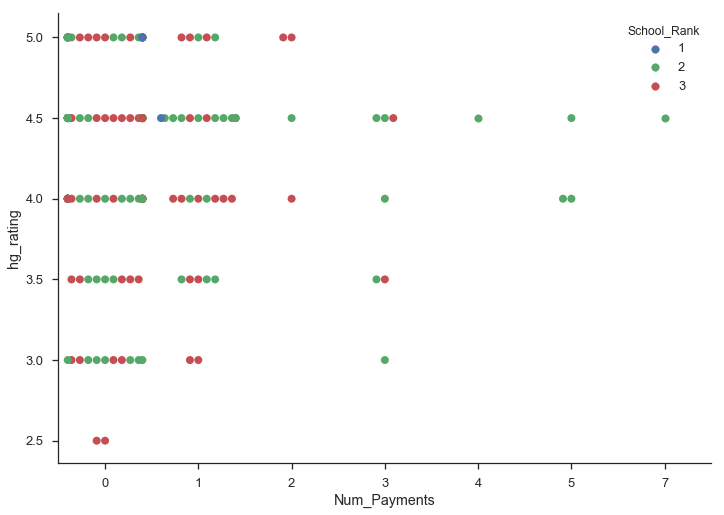

In [95]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set(style='ticks', context='talk')

sns.swarmplot('Num_Payments', 'hg_rating', hue='School_Rank',data=nysdr_hg,size=8)
sns.despine()

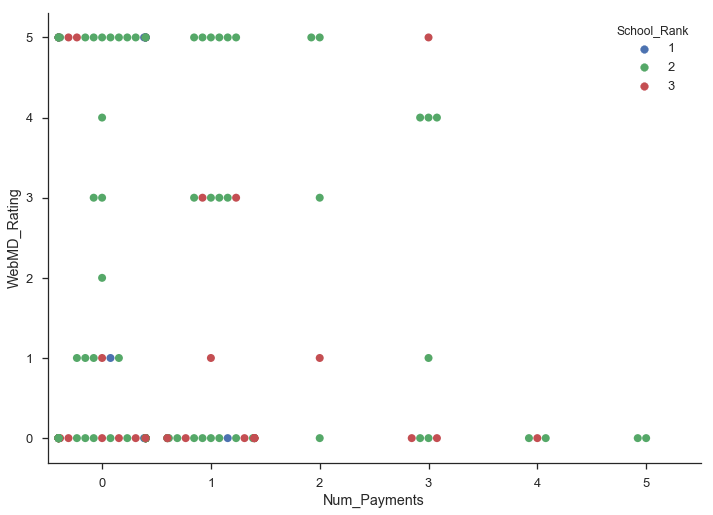

In [100]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set(style='ticks', context='talk')

sns.swarmplot('Num_Payments', 'WebMD_Rating', size=8,hue='School_Rank',data=nysdr_webmd)#[nysdr_webmd['WebMD_Rating']>0])#data=nysdr_webmd)
sns.despine()

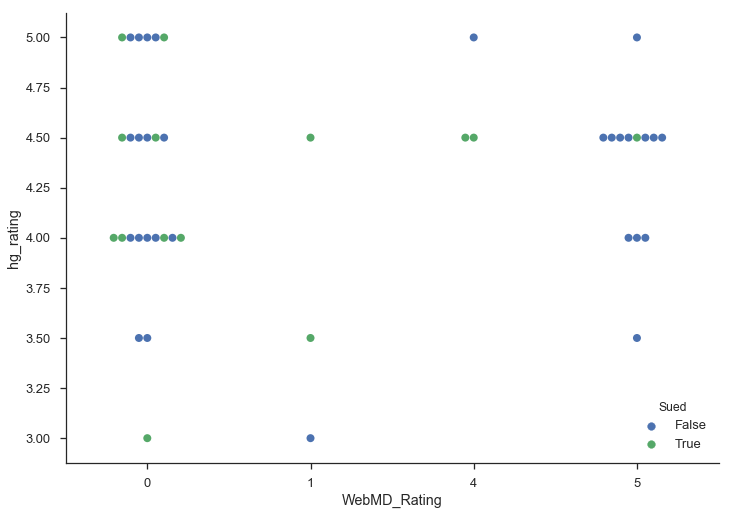

In [103]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set(style='ticks', context='talk')

sns.swarmplot('WebMD_Rating','hg_rating',size=8,hue='Sued', data=all_merge[nysdr_webmd['WebMD_Rating']>0])
sns.despine()

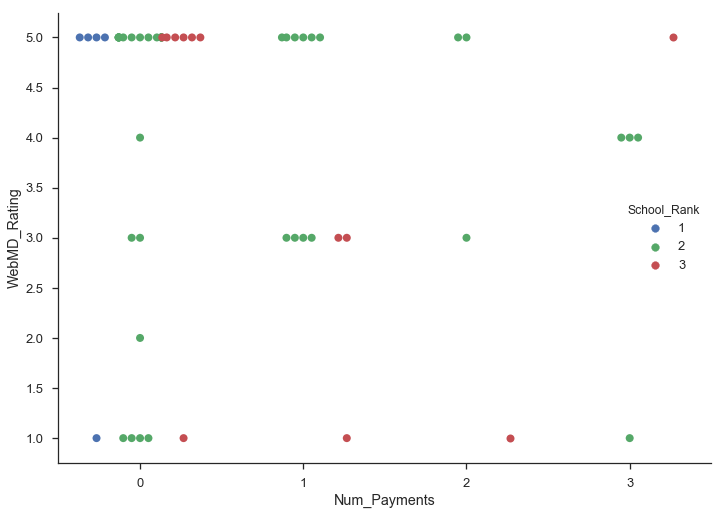

In [105]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set(style='ticks', context='talk')

ax=sns.swarmplot('Num_Payments','WebMD_Rating',size=8,hue='School_Rank', data=nysdr_webmd[nysdr_webmd['WebMD_Rating']>0], dodge=True)#[nysdr_webmd['WebMD_Rating']>0])
sns.despine()

This plot might indicate that other factors influence WebMD rating more than competence.

In [45]:
sns.swarmplot?

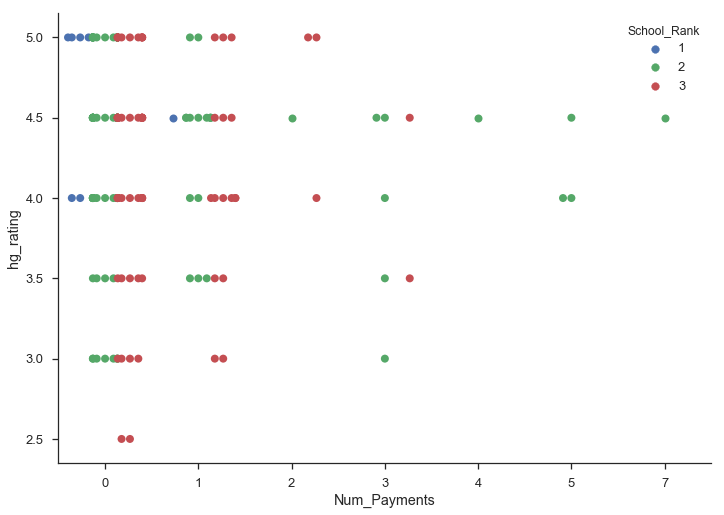

In [107]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.set(style='ticks', context='talk')
#snsDF = sns.load_dataset('df_merge')

ax=sns.swarmplot('Num_Payments','hg_rating',size=8,hue='School_Rank', data=nysdr_hg, dodge=True)#[nysdr_webmd['WebMD_Rating']>0])
sns.despine()
# ax.legend_.remove()